In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [2]:
path='/home/drallab/datamining/Yelp_Sentiment_Analysis-master/data/review_subset.csv'
data = pd.read_csv(path)
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781551 entries, 0 to 4781550
Data columns (total 6 columns):
business_id    object
date           object
review_id      object
stars          float64
text           object
user_id        object
dtypes: float64(1), object(5)
memory usage: 218.9+ MB


In [3]:
df1 = data.iloc[:,3:5]

In [4]:
df1.info()
df1 = df1[(df1.stars == 5) | (df1.stars == 1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781551 entries, 0 to 4781550
Data columns (total 2 columns):
stars    float64
text     object
dtypes: float64(1), object(1)
memory usage: 73.0+ MB


In [5]:
df1 = shuffle(df1)

In [6]:
df1.dropna(inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3026342 entries, 4061719 to 2204019
Data columns (total 2 columns):
stars    float64
text     object
dtypes: float64(1), object(1)
memory usage: 69.3+ MB


In [8]:
df1.isnull().values.any()

False

In [9]:
df1.head()

stars                                               text
4061719    5.0  EXCELLENT !  You would think Mr. Sinatra is st...
3712864    5.0  Staff is amazing! We went on Christmas and the...
3633412    1.0  The place was so unorganized, and to be 'polit...
2177025    5.0  Although I have moved from the Phoenix area, I...
1052104    1.0  I don't even want to give this establishment o...

In [10]:
X_data = df1['text']
y_data = df1['stars']   

In [11]:
X_data.shape

(3026342,)

In [12]:
y_data.shape

(3026342,)

In [13]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_data,y_data,test_size =0.3,random_state=42)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(2118439,)
(907903,)
(2118439,)
(907903,)


In [14]:
#CountVectorizer shall be used to work on text data
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm


<2118439x341772 sparse matrix of type '<class 'numpy.int64'>'
	with 136955946 stored elements in Compressed Sparse Row format>

In [15]:
vect.vocabulary_

{'one': 216199,
 'of': 214325,
 'the': 297881,
 'best': 45197,
 'denny': 90691,
 've': 316419,
 'been': 43132,
 'to': 301848,
 'service': 267701,
 'was': 322501,
 'excellent': 112056,
 'and': 27227,
 'extremely': 113808,
 'happy': 141335,
 'with': 327516,
 'food': 121919,
 'they': 298898,
 'added': 19988,
 'this': 299318,
 'new': 208574,
 'appetizer': 30200,
 'menu': 194779,
 'nachos': 205417,
 'different': 93717,
 'dips': 94691,
 'got': 134628,
 'my': 204590,
 'usual': 314644,
 'superbird': 289006,
 'as': 33102,
 'always': 25408,
 'fresh': 124417,
 'flavorful': 120326,
 'nothing': 211682,
 'beats': 42474,
 'lomo': 182079,
 'saltado': 260532,
 'big': 46395,
 'portions': 234681,
 'great': 135871,
 'cocktails': 73410,
 'customer': 84485,
 'jean': 162121,
 'her': 144496,
 'staff': 283160,
 'do': 96974,
 'job': 163747,
 'will': 326661,
 'definitely': 88974,
 'be': 42190,
 'coming': 74879,
 'back': 38384,
 'place': 231467,
 'small': 276002,
 'class': 71704,
 'size': 274138,
 'giving': 13222

In [16]:
vect.get_feature_names()

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '000000000',
 '00000000000',
 '00000000000000',
 '000000000000000',
 '0000000000000000',
 '0000000000000000000',
 '000000000000000000000',
 '0000000000000001',
 '00000000001',
 '0000000001',
 '000000001',
 '00000001',
 '0000001',
 '000001',
 '000009',
 '00001',
 '00003',
 '00004590',
 '00005',
 '000067',
 '0000722156',
 '0001',
 '0002',
 '0002837143',
 '0003',
 '00032',
 '000487',
 '0004cd4c1e46626d4526f',
 '0005',
 '0006',
 '0007',
 '0009',
 '000btu',
 '000ft',
 '000ish',
 '000k',
 '000km',
 '000lb',
 '000lbs',
 '000m',
 '000mg',
 '000mi',
 '000mile',
 '000miles',
 '000oz',
 '000pds',
 '000percent',
 '000pm',
 '000psi',
 '000rpm',
 '000s',
 '000sf',
 '000sq',
 '000sqft',
 '000sta',
 '000th',
 '000x',
 '000xs',
 '001',
 '00107168',
 '001383',
 '001463',
 '0015',
 '00161',
 '00184',
 '001cc4c002e0',
 '001gchwixbbozawig3q3c1nxg',
 '002',
 '0020',
 '00204',
 '0022',
 '002345',
 '0027',
 '00278',
 '003',
 '0030',
 '0031',
 '0034',
 

In [17]:
X_test_dtm = vect.transform(X_test)

In [18]:
#Encode 1 and 5 rating
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [19]:
#using GridsearchCV for parameter selection and tuning

from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
grid_params = {'alpha':np.arange(0.0,1.0,0.1)}
grid = GridSearchCV(MultinomialNB(),param_grid=grid_params,cv=10)
grid.fit(X_train_dtm,y_train)

/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/software/anaconda3/5.1.0/lib/python3.6/site-packages/sklearn/naive_bayes.py:472

GridSearchCV(cv=10, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [20]:
grid.best_params_

{'alpha': 0.1}

In [21]:
#Best score
grid.best_score_

0.9330790265851412

In [22]:
#Lets use alpha = 1.0 with MultinomialNB
nb = MultinomialNB(alpha=0.10)
nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [23]:
#Lets predict with test data
nb_pred = nb.predict(X_test_dtm)

In [24]:
#lets analyse 25 elements of predicted and test y labels , 0 means 1 rating and 1 means 5 rating 
print('Predicted',(nb_pred[:25]))
print('True     ',(y_test[:25]))

Predicted [1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
True      [1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


accuracy score 0.9335248369043829


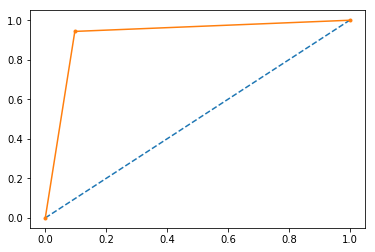

In [26]:
#Lets calculate the accuracy 
from sklearn import metrics
print ('accuracy score',metrics.accuracy_score(y_test,nb_pred))


    import matplotlib.pyplot as plt



    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc

    fpr, tpr, thresholds = roc_curve(y_test,nb_pred)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    # show the plot
    plt.show()

In [28]:
#Lets see the confusion metrix 
conf_matrix=metrics.confusion_matrix(y_test,nb_pred)
print('confusion matrix \n',conf_matrix)

confusion matrix 
 [[201975  21424]
 [ 38924 645580]]


In [29]:
pd.crosstab(y_test, nb_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted       0       1     All
True                             
0          201975   21424  223399
1           38924  645580  684504
All        240899  667004  907903

In [30]:
auc_val = metrics.roc_auc_score(y_test,nb_pred)
print('ROC_AUC_SCORE:- ', auc_val)


ROC_AUC_SCORE:-  0.9236176533671674


In [31]:
#Sensitivity : is the classifier to detecting positive instances , also True Positive Rate" or "Recall"
recall_NB= metrics.recall_score(y_test,nb_pred)
print ('Recall score',recall_NB)


Recall score 0.9431354674333532


In [32]:
#Precision: When a positive value is predicted, how often is the prediction correct?
#How "precise" is the classifier when predicting positive instances?

Precision_NB= metrics.precision_score(y_test,nb_pred)
print('Precision Score', Precision_NB)

Precision Score 0.9678802525921884


In [39]:
#print rating 1 reviews which are falsely callisified as positive i.e rating 5 ,diplay False Postive review comments
X_test[(nb_pred == 1) & (y_test == 0)]

8525    Stopped in for bagels, never again. I will not...
6765    Total: $81 for 3 people\n\nWe, myself and two ...
2995    They odds of winning are bad! You are more lik...
4688    Ordered trough uber eats it took longer than e...
2957    Went their so wanting an awesome Pot Pie   wal...
2193    This is my first time posting to Yelp despite ...
7212    I had a meeting for an estimate on June 1. Chr...
9427    I REALLY wanted to like this spa. In fact, my ...
364     Came here on a whim to try it out with my fian...
5746    There was a time I ate there every week. I lov...
6406    The chips and salsa were underwhelming. Chips ...
4131    They have absolutely not one ounce of ability ...
8657    This place is not closed- but I assume it may ...
614     Hands down worst gluten free cupcake I've ever...
3600    This place is subpar for the price. If I'm pay...
8919    I was really hungry today and I decided to sto...
1306    I went here for lunch today, craving a green c...
5071    Where 

In [33]:
#Lets inspect 1406 review 
X_test[197]

"I'm a regular at chipotle in California, this is my first visit to this chipotle on s.las Vegas strip.this is pretty new place I think, I took a veggie bowl in which the rice was undone and the fajitas were all burnt, the quantity offered was less than usual. I'm very unhappy with this place."

In [34]:
#print rating 5 reviews which are falsely callisified as negative i.e rating 1,diplay True Negative review comments
X_test[(nb_pred == 0) & (y_test == 1)]

2315023    Had a my heater go out last week. Called up an...
735345     I took my BMW 325i in to have a window regulat...
1896902    I recently attended my residency for school an...
4240695    We were looking to get grass in our back yard,...
2846997    I have been a patient of Verve Chiropractic fo...
2076464    I had my phone for one day and it got nearly d...
3598675    I needed four tons of vista gold. I ordered it...
58025      ok so i waited to do a review like till(12-21-...
1257734    I just want to commend David on his work and c...
3426591    If you're in Vegas this is the Nike for you. I...
746947     This was my second visit in 3 weeks to Chapman...
2345130    Today online ordering pick up was super fast. ...
1466446    Called with an 11th hour fix for my bike when ...
4659606    Don't know why this place got a low review. I ...
2042702    Drivers were courteous and on time.  Delivery ...
2015536    Pretty good food.\nThere's 2,000+ items. Serio...
3515131    The staff was

In [36]:
X_test[4769240]

'Let\'s face it....I am irresponsible...no no don\'t argue I need to accept this one. \n\nI pay this bill just before they sell my stuff every time. Seriously. They are so good about calling to let me know and never make me feel embarassed about it. They are still super sweet to me from the first "your payment is late call" to me paying the $300 I owe them for three months of storing $230 worth of stuff. \n\nThey even called to let me know they had noticed that I locked my unit incorrectly, and it could be opened. (I told you I am irresponsible).\n\nI treat them poorly and they continuously give me great service (reminds me of this girl I used to date only without the crazy)\n\nI would reccomend them!'

In [37]:
#Lets print classifcation report
class_report = metrics.classification_report(y_test,nb_pred)
print (class_report)

             precision    recall  f1-score   support

          0       0.84      0.90      0.87    223399
          1       0.97      0.94      0.96    684504

avg / total       0.94      0.93      0.93    907903

